#**Data Collection**



In [13]:
!unzip '/content/Dataset.zip'

Archive:  /content/Dataset.zip
  inflating: Dataset/test/1/3.jpg    
  inflating: Dataset/test/3/2.jpg    
  inflating: Dataset/test/5/1.jpg    
  inflating: Dataset/test/2/2.jpg    
  inflating: Dataset/test/3/1.jpg    
  inflating: Dataset/test/5/2.jpg    
  inflating: Dataset/test/5/0.jpg    
  inflating: Dataset/test/1/1.jpg    
  inflating: Dataset/test/5/4.jpg    
  inflating: Dataset/test/0/3.jpg    
  inflating: Dataset/test/2/0.jpg    
  inflating: Dataset/test/3/3.jpg    
  inflating: Dataset/test/0/2.jpg    
  inflating: Dataset/test/1/2.jpg    
  inflating: Dataset/test/1/4.jpg    
  inflating: Dataset/test/4/4.jpg    
  inflating: Dataset/test/3/0.jpg    
  inflating: Dataset/test/1/0.jpg    
  inflating: Dataset/test/3/4.jpg    
  inflating: Dataset/test/2/1.jpg    
  inflating: Dataset/test/4/2.jpg    
  inflating: Dataset/test/5/3.jpg    
  inflating: Dataset/test/2/4.jpg    
  inflating: Dataset/test/4/3.jpg    
  inflating: Dataset/test/0/1.jpg    
  inflating: Datase

In [14]:
from keras.preprocessing.image import ImageDataGenerator


#Define the parameters/arguments for ImageDataGenertor Class

In [15]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


#Applying ImageDataGenerator functionality to trainset and testset

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
x_train=train_datagen.flow_from_directory(r'/content/Dataset/train',target_size=(64,64),batch_size=32,color_mode='grayscale',class_mode='categorical')
x_test=train_datagen.flow_from_directory(r'/content/Dataset/test',target_size=(64,64),batch_size=32,color_mode='grayscale',class_mode='categorical')


Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


#**Model Building**


#Importing necessary libraries






In [18]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D

#Initializing The Model

In [19]:
model=Sequential()

#Adding CNN Layers

In [20]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#Adding Dense Layer

In [21]:
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=6,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

#Configure The Learning Process

In [23]:
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Train The Model

In [31]:
#Fitting the model
model.fit_generator(
    generator=x_train,steps_per_epoch=len(x_train),
    epochs=20,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


19/19 [==============================] - 3s 156ms/step - loss: 0.0883 - accuracy: 0.9596 - val_loss: 0.3286 - val_accuracy: 0.9333
Epoch 2/20
19/19 [==============================] - 3s 144ms/step - loss: 0.1322 - accuracy: 0.9512 - val_loss: 0.1710 - val_accuracy: 0.9333
Epoch 3/20
19/19 [==============================] - 3s 144ms/step - loss: 0.1502 - accuracy: 0.9579 - val_loss: 0.2703 - val_accuracy: 0.9333
Epoch 4/20
19/19 [==============================] - 3s 147ms/step - loss: 0.0786 - accuracy: 0.9781 - val_loss: 0.2235 - val_accuracy: 0.9333
Epoch 5/20
19/19 [==============================] - 5s 254ms/step - loss: 0.0595 - accuracy: 0.9832 - val_loss: 0.1873 - val_accuracy: 0.9667
Epoch 6/20
19/19 [==============================] - 5s 264ms/step - loss: 0.0710 - accuracy: 0.9747 - val_loss: 0.2577 - val_accuracy: 0.9333
Epoch 7/20
19/19 [==============================] - 3s 145ms/step - loss: 0.0494 - accuracy: 0.9815 - val_loss: 0.3026 - val_accuracy: 0.9333
Epoch 8/20
19/19 

#Save The Model

In [32]:
#Saving our model
model.save('gesture.h5')
model_json=model.to_json()
with open("model-bw.json","w") as json_file:
  json_file.write(model_json)

#Test The Model

In [33]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
test_model=load_model('gesture.h5')

In [37]:
img=image.load_img('/content/Dataset/test/3/3.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
predict_x=(model.predict(x_test)>0.5).astype("int64")
pred=np.argmax(predict_x,axis=-1)
pred

1/1 [==============================] - 0s 92ms/step


array([3, 5, 1, 0, 4, 1, 0, 1, 3, 3, 2, 5, 0, 1, 1, 0, 2, 5, 4, 3, 2, 3,
       3, 4, 0, 5, 1, 4, 5, 2])

In [38]:
img=image.load_img('/content/Dataset/test/4/2.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
predict_x=model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)
classes_x
predict_x

1/1 [==============================] - 0s 100ms/step


array([[6.30566326e-04, 9.98306751e-01, 1.06113288e-03, 1.43960017e-06,
        3.75283051e-12, 4.04442495e-12],
       [4.52351196e-05, 9.99655366e-01, 2.93559046e-04, 5.80538881e-06,
        1.90221224e-11, 2.83837336e-14],
       [7.46023469e-12, 1.14258634e-18, 4.30053887e-13, 1.29719386e-02,
        9.87022460e-01, 5.65516621e-06],
       [2.03079461e-23, 6.46422305e-31, 2.42607540e-25, 2.51031004e-15,
        3.66114143e-08, 9.99999940e-01],
       [9.34402058e-31, 1.01784102e-32, 1.32221506e-22, 1.40412652e-13,
        1.62101330e-07, 9.99999821e-01],
       [1.48083997e-12, 2.71114823e-05, 9.99816179e-01, 1.56897033e-04,
        4.76667143e-12, 3.57463364e-10],
       [3.49121166e-07, 9.98946369e-01, 1.05310662e-03, 1.97743333e-07,
        6.98312339e-13, 1.21902811e-15],
       [3.26295302e-16, 4.32767430e-17, 3.34128315e-11, 1.17914476e-01,
        8.81827831e-01, 2.57662265e-04],
       [5.96396641e-23, 4.30954743e-33, 3.82422695e-26, 1.25717414e-15,
        2.67656519e-09, 

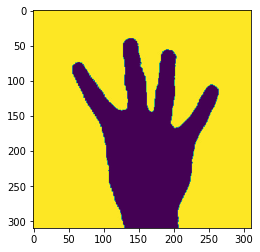

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/Dataset/test/4/0.jpg')
imgplot=plt.imshow(img)
plt.show()

In [40]:
imgload=image.load_img('/content/Dataset/test/1/4.jpg',color_mode='grayscale',target_size=(64,64))
res=image.img_to_array(imgload)
res.shape


(64, 64, 1)

In [41]:
type(res)

numpy.ndarray

In [42]:
res=np.expand_dims(res,axis=0)
res.shape

(1, 64, 64, 1)

#Predict the result

In [43]:
pred_res=np.argmax(test_model.predict(res),axis=-1)
pred_res

1/1 [==============================] - 0s 72ms/step


array([1])

In [44]:
index=['0','1','2','3','4','5']
result=str(index[pred_res[0]])
result

'1'